<a href="https://colab.research.google.com/github/Josaphat12-tech/Deep-Learning--And-Machine-Learning-For-Real-Beginners/blob/main/Customer_Churn_Prediction_(Technics_To_Handle_Imbalanced_Data).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [70]:
import tensorflow as tf
from tensorflow import keras
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
url = r'https://raw.githubusercontent.com/codebasics/deep-learning-keras-tf-tutorial/master/11_chrun_prediction/customer_churn.csv'

In [71]:
df = pd.read_csv(url)
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [72]:
df.drop('customerID',axis='columns',inplace=True) 
df.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [73]:
pd.to_numeric(df.TotalCharges,errors = 'coerce').isnull()

0       False
1       False
2       False
3       False
4       False
        ...  
7038    False
7039    False
7040    False
7041    False
7042    False
Name: TotalCharges, Length: 7043, dtype: bool

In [74]:
df[pd.to_numeric(df.TotalCharges,errors = 'coerce').isnull()]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


In [75]:
df[pd.to_numeric(df.TotalCharges,errors = 'coerce').isnull()].shape

(11, 20)

In [76]:
df.shape

(7043, 20)

In [77]:
df.iloc[488] #or df.iloc[488]['TotalCharges]

gender                                 Female
SeniorCitizen                               0
Partner                                   Yes
Dependents                                Yes
tenure                                      0
PhoneService                               No
MultipleLines                No phone service
InternetService                           DSL
OnlineSecurity                            Yes
OnlineBackup                               No
DeviceProtection                          Yes
TechSupport                               Yes
StreamingTV                               Yes
StreamingMovies                            No
Contract                             Two year
PaperlessBilling                          Yes
PaymentMethod       Bank transfer (automatic)
MonthlyCharges                          52.55
TotalCharges                                 
Churn                                      No
Name: 488, dtype: object

In [78]:
df1 = df[df.TotalCharges!=' '] #Droping those places with false values then this is gon' return a new dataframe
df1.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [79]:
df1.shape

(7032, 20)

In [80]:
df1.TotalCharges = pd.to_numeric(df1.TotalCharges)

/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:5170: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [81]:
df1.TotalCharges.dtypes

dtype('float64')

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


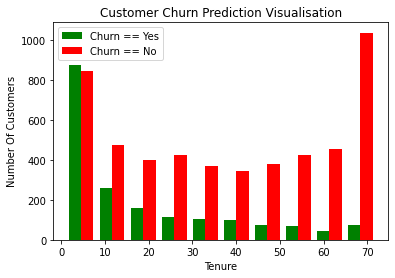

In [82]:
tenure_churn_NO = df1[df1.Churn =='No'].tenure
tenure_churn_Yes = df1[df1.Churn =='Yes'].tenure

plt.hist([tenure_churn_Yes,tenure_churn_NO],color=['green','red'],label=['Churn == Yes','Churn == No']);
plt.xlabel('Tenure')
plt.ylabel('Number Of Customers')
plt.title('Customer Churn Prediction Visualisation')
plt.legend();

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


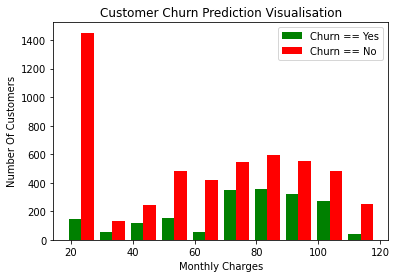

In [83]:
mc_churn_NO = df1[df1.Churn =='No'].MonthlyCharges
mc_churn_Yes = df1[df1.Churn =='Yes'].MonthlyCharges

blood_sugar_men = [113,85,90,150,149,88,93,115,135,80,77,82,129]
blood_sugar_women = [67,98,89,120,133,150,84,69,89,79,120,112,100]

plt.hist([mc_churn_Yes,mc_churn_NO],color=['green','red'],label=['Churn == Yes','Churn == No']);
plt.xlabel('Monthly Charges')
plt.ylabel('Number Of Customers')
plt.title('Customer Churn Prediction Visualisation')
plt.legend()

In [84]:
def print_unique_values(df):
  for column in df:
    if df[column].dtypes == 'object':
      print(f'{column} : {df[column].unique()}')

In [85]:
print_unique_values(df1)

gender : ['Female' 'Male']
Partner : ['Yes' 'No']
Dependents : ['No' 'Yes']
PhoneService : ['No' 'Yes']
MultipleLines : ['No phone service' 'No' 'Yes']
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : ['No' 'Yes' 'No internet service']
OnlineBackup : ['Yes' 'No' 'No internet service']
DeviceProtection : ['No' 'Yes' 'No internet service']
TechSupport : ['No' 'Yes' 'No internet service']
StreamingTV : ['No' 'Yes' 'No internet service']
StreamingMovies : ['No' 'Yes' 'No internet service']
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : ['Yes' 'No']
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn : ['No' 'Yes']


In [86]:
df1.replace('No internet service','No',inplace=True)
df1.replace('No phone service','No',inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4389: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  method=method,


In [87]:
print_unique_values(df1)

gender : ['Female' 'Male']
Partner : ['Yes' 'No']
Dependents : ['No' 'Yes']
PhoneService : ['No' 'Yes']
MultipleLines : ['No' 'Yes']
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : ['No' 'Yes']
OnlineBackup : ['Yes' 'No']
DeviceProtection : ['No' 'Yes']
TechSupport : ['No' 'Yes']
StreamingTV : ['No' 'Yes']
StreamingMovies : ['No' 'Yes']
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : ['Yes' 'No']
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn : ['No' 'Yes']


In [88]:
yes_no_columns = ['Partner','Dependents','PhoneService','MultipleLines','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingMovies','PaperlessBilling','StreamingTV','Churn']

for col in yes_no_columns:
  df1[col].replace({'Yes': 1,'No': 0},inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:4582: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  method=method,


In [89]:
for col in df1:
  print(f'{col}: {df1[col].unique()}')

gender: ['Female' 'Male']
SeniorCitizen: [0 1]
Partner: [1 0]
Dependents: [0 1]
tenure: [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
PhoneService: [0 1]
MultipleLines: [0 1]
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: [0 1]
OnlineBackup: [1 0]
DeviceProtection: [0 1]
TechSupport: [0 1]
StreamingTV: [0 1]
StreamingMovies: [0 1]
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: [1 0]
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges: [29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalCharges: [  29.85 1889.5   108.15 ...  346.45  306.6  6844.5 ]
Churn: [0 1]


In [90]:
df1['gender'].replace({'Female' : 1,'Male' : 0},inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:4582: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  method=method,


In [91]:
df1['gender'].unique()

array([1, 0])

In [92]:
df2 = pd.get_dummies(data=df1,columns=['InternetService','Contract','PaymentMethod'])
df2.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'PaperlessBilling', 'MonthlyCharges', 'TotalCharges', 'Churn',
       'InternetService_DSL', 'InternetService_Fiber optic',
       'InternetService_No', 'Contract_Month-to-month', 'Contract_One year',
       'Contract_Two year', 'PaymentMethod_Bank transfer (automatic)',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check'],
      dtype='object')

In [93]:
df2.sample(4)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
1989,1,0,1,1,35,0,0,1,0,0,1,1,0,1,46.35,1662.05,0,1,0,0,0,0,1,0,1,0,0
4661,1,0,1,1,70,1,1,1,1,1,1,1,1,1,89.00,6293.20,0,1,0,0,0,0,1,1,0,0,0
6744,0,0,0,0,68,1,1,1,1,1,0,1,0,0,101.35,7110.75,0,0,1,0,0,1,0,1,0,0,0
6198,0,0,1,1,25,1,1,0,0,0,0,0,0,0,25.50,630.60,0,0,0,1,0,0,1,0,1,0,0


In [94]:
df2.dtypes

gender                                       int64
SeniorCitizen                                int64
Partner                                      int64
Dependents                                   int64
tenure                                       int64
PhoneService                                 int64
MultipleLines                                int64
OnlineSecurity                               int64
OnlineBackup                                 int64
DeviceProtection                             int64
TechSupport                                  int64
StreamingTV                                  int64
StreamingMovies                              int64
PaperlessBilling                             int64
MonthlyCharges                             float64
TotalCharges                               float64
Churn                                        int64
InternetService_DSL                          uint8
InternetService_Fiber optic                  uint8
InternetService_No             

In [95]:
col_to_scale = ['tenure','MonthlyCharges','TotalCharges']

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

df2[col_to_scale] = scaler.fit_transform(df2[col_to_scale])

In [96]:
df2.sample(3)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
348,1,0,0,0,0.309859,0,0,0,0,0,0,1,1,1,0.265672,0.112861,0,1,0,0,1,0,0,0,0,1,0
5077,1,0,1,1,0.084507,1,0,0,0,0,0,0,0,0,0.015920,0.014465,0,0,0,1,0,0,1,0,0,0,1
1353,0,0,1,1,0.915493,1,0,0,0,0,0,0,0,1,0.020896,0.154708,0,0,0,1,0,1,0,0,0,1,0


In [97]:
for col in df2:
  print(f'{col} : {df2[col].unique()}')

gender : [1 0]
SeniorCitizen : [0 1]
Partner : [1 0]
Dependents : [0 1]
tenure : [0.         0.46478873 0.01408451 0.61971831 0.09859155 0.29577465
 0.12676056 0.38028169 0.85915493 0.16901408 0.21126761 0.8028169
 0.67605634 0.33802817 0.95774648 0.71830986 0.98591549 0.28169014
 0.15492958 0.4084507  0.64788732 1.         0.22535211 0.36619718
 0.05633803 0.63380282 0.14084507 0.97183099 0.87323944 0.5915493
 0.1971831  0.83098592 0.23943662 0.91549296 0.11267606 0.02816901
 0.42253521 0.69014085 0.88732394 0.77464789 0.08450704 0.57746479
 0.47887324 0.66197183 0.3943662  0.90140845 0.52112676 0.94366197
 0.43661972 0.76056338 0.50704225 0.49295775 0.56338028 0.07042254
 0.04225352 0.45070423 0.92957746 0.30985915 0.78873239 0.84507042
 0.18309859 0.26760563 0.73239437 0.54929577 0.81690141 0.32394366
 0.6056338  0.25352113 0.74647887 0.70422535 0.35211268 0.53521127]
PhoneService : [0 1]
MultipleLines : [0 1]
OnlineSecurity : [0 1]
OnlineBackup : [1 0]
DeviceProtection : [0 1]
Tech

In [98]:
df2.dtypes

gender                                       int64
SeniorCitizen                                int64
Partner                                      int64
Dependents                                   int64
tenure                                     float64
PhoneService                                 int64
MultipleLines                                int64
OnlineSecurity                               int64
OnlineBackup                                 int64
DeviceProtection                             int64
TechSupport                                  int64
StreamingTV                                  int64
StreamingMovies                              int64
PaperlessBilling                             int64
MonthlyCharges                             float64
TotalCharges                               float64
Churn                                        int64
InternetService_DSL                          uint8
InternetService_Fiber optic                  uint8
InternetService_No             

In [99]:
X = df2.drop('Churn',axis='columns')
y = df2['Churn']

In [100]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=5)

In [101]:
X_train.shape, X_test.shape

((5625, 26), (1407, 26))

In [102]:
y_train.shape, y_test.shape

((5625,), (1407,))

In [103]:
X_train.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,MonthlyCharges,TotalCharges,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
5664,1,1,0,0,0.126761,1,0,0,0,1,0,0,1,1,0.660199,0.097709,0,1,0,1,0,0,0,1,0,0
101,1,0,1,1,0.000000,1,0,0,0,0,0,0,0,0,0.011940,0.000075,0,0,1,1,0,0,0,0,1,0
2621,0,0,1,0,0.985915,1,0,0,1,1,1,1,1,1,0.605473,0.639978,1,0,0,0,0,1,0,1,0,0
392,1,1,0,0,0.014085,1,0,0,0,0,0,0,0,1,0.259204,0.008135,1,0,0,1,0,0,0,0,1,0
1327,0,0,1,0,0.816901,1,1,0,0,1,0,1,1,1,0.808458,0.685703,0,1,0,0,1,0,1,0,0,0


In [104]:
len(X_train.columns)

26

In [105]:
from sklearn.metrics import confusion_matrix, classification_report

def ANN(X_train,y_train,X_test,y_test,loss,weight):
  model = keras.Sequential([
                  keras.layers.Dense(26,input_dim=26,activation='relu'),
                  keras.layers.Dense(15,activation='relu'),
                  keras.layers.Dense(1,activation='sigmoid'),
                  ])
  model.compile(optimizer = 'adam', loss = loss, metrics = ['accuracy'])

  if weight == -1:
    model.fit(X_train,y_train,epochs=100)
  else:
    model.fit(X_train,y_train,epochs=100,class_weight = weight)

  print(model.evaluate(X_test,y_test))

  y_pred = model.predict(X_test).reshape(-1)
  y_preds = np.round(y_pred)

  print('Classification Report : \n',classification_report(y_test,y_preds))
  
  
  return y_preds

In [106]:
y_preds = ANN(X_train, y_train, X_test, y_test,'binary_crossentropy', -1)

Epoch 1/100
176/176 [==============================] - 1s 2ms/step - loss: 0.4738 - accuracy: 0.7728
Epoch 2/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4240 - accuracy: 0.7968
Epoch 3/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4178 - accuracy: 0.8043
Epoch 4/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4150 - accuracy: 0.8052
Epoch 5/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4123 - accuracy: 0.8034
Epoch 6/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4105 - accuracy: 0.8075
Epoch 7/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4089 - accuracy: 0.8071
Epoch 8/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4072 - accuracy: 0.8094
Epoch 9/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4058 - accuracy: 0.8101
Epoch 10/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4038 - accura

#Mitigating Skewdness of Data

Method 1: Undersampling

reference: https://www.kaggle.com/rafjaa/resampling-strategies-for-imbalanced-datasets

In [107]:
y_test.value_counts()

0    999
1    408
Name: Churn, dtype: int64

In [108]:
# class count
class_count_0, class_count_1 = df1.Churn.value_counts()

# Devide by the class
df_class_0 = df2[df2['Churn'] == 0]
df_class_1 = df2[df2['Churn'] == 1]

In [109]:
df_class_0.shape

(5163, 27)

In [110]:
df_class_1.shape

(1869, 27)

In [111]:
class_count_0, class_count_1

(5163, 1869)

In [112]:
df_class_0_under = df_class_0.sample(class_count_1)

df_test_under = pd.concat([df_class_0_under,df_class_1],axis = 0)
df_test_under.shape

(3738, 27)

In [113]:
print('Random Under-Sampling:')
print(df_test_under.Churn.value_counts())

Random Under-Sampling:
1    1869
0    1869
Name: Churn, dtype: int64


In [114]:
 X = df_test_under.drop('Churn',axis='columns')
 y = df_test_under['Churn']

from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=15,stratify=y)

In [115]:
X_train.shape, X_test.shape

((2990, 26), (748, 26))

In [116]:
y_train.shape,y_test.shape

((2990,), (748,))

In [117]:
y_train.value_counts()

1    1495
0    1495
Name: Churn, dtype: int64

In [118]:
y_preds = ANN(X_train, y_train, X_test, y_test,'binary_crossentropy', -1)

Epoch 1/100
94/94 [==============================] - 1s 2ms/step - loss: 0.6351 - accuracy: 0.6632
Epoch 2/100
94/94 [==============================] - 0s 2ms/step - loss: 0.5118 - accuracy: 0.7662
Epoch 3/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4869 - accuracy: 0.7769
Epoch 4/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4791 - accuracy: 0.7799
Epoch 5/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4737 - accuracy: 0.7753
Epoch 6/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4714 - accuracy: 0.7776
Epoch 7/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4671 - accuracy: 0.7793
Epoch 8/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4643 - accuracy: 0.7773
Epoch 9/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4625 - accuracy: 0.7796
Epoch 10/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4604 - accuracy: 0.7839
Epoch 11/

#Method2: Oversampling

In [119]:
class_count_0,class_count_1

(5163, 1869)

In [120]:
df_class_1.shape

(1869, 27)

In [121]:
df_class_1.sample(2000,replace=True).shape

(2000, 27)

In [123]:
df_class_1_Over = df_class_1.sample(class_count_0,replace=True)
df_class_1_Over.shape

((5163, 27), (5163, 27))

In [124]:
df_test_Over = pd.concat([df_class_0,df_class_1_Over],axis=0)
df_test_Over.shape

(10326, 27)

In [125]:
print('Random Over-Sampling:')
print(df_test_Over.Churn.value_counts())

Random Over-Sampling:
1    5163
0    5163
Name: Churn, dtype: int64


In [126]:
X = df_test_Over.drop('Churn',axis = 'columns')
y = df_test_Over.Churn

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=15, stratify=y)

In [141]:
y_train.value_counts(), y_test.value_counts()

(1    4130
 0    4130
 Name: Churn, dtype: int64, 1    1033
 0    1033
 Name: Churn, dtype: int64)

In [142]:
y_preds = ANN(X_train, y_train, X_test, y_test,'binary_crossentropy', -1)

Epoch 1/100
259/259 [==============================] - 1s 2ms/step - loss: 0.5405 - accuracy: 0.7338
Epoch 2/100
259/259 [==============================] - 0s 2ms/step - loss: 0.4891 - accuracy: 0.7637
Epoch 3/100
259/259 [==============================] - 0s 2ms/step - loss: 0.4812 - accuracy: 0.7674
Epoch 4/100
259/259 [==============================] - 0s 2ms/step - loss: 0.4756 - accuracy: 0.7711
Epoch 5/100
259/259 [==============================] - 0s 2ms/step - loss: 0.4714 - accuracy: 0.7729
Epoch 6/100
259/259 [==============================] - 1s 2ms/step - loss: 0.4680 - accuracy: 0.7734
Epoch 7/100
259/259 [==============================] - 0s 2ms/step - loss: 0.4651 - accuracy: 0.7751
Epoch 8/100
259/259 [==============================] - 1s 2ms/step - loss: 0.4617 - accuracy: 0.7801
Epoch 9/100
259/259 [==============================] - 0s 2ms/step - loss: 0.4601 - accuracy: 0.7820
Epoch 10/100
259/259 [==============================] - 0s 2ms/step - loss: 0.4573 - accura

#**Method 3 : SMOTE**

To install imbalanced-learn library use pip install imbalanced-learn command

In [143]:
X = df2.drop('Churn',axis='columns')
y = df2.Churn

In [144]:
y.value_counts()

0    5163
1    1869
Name: Churn, dtype: int64

In [148]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(sampling_strategy='minority')
X_sm, y_sm = smote.fit_resample(X, y)
y_sm.value_counts()

1    5163
0    5163
Name: Churn, dtype: int64

In [149]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X_sm, y_sm, test_size=0.2, random_state=15, stratify=y_sm)

In [150]:
y_train.value_counts()

1    4130
0    4130
Name: Churn, dtype: int64

In [151]:
y_test.value_counts()

1    1033
0    1033
Name: Churn, dtype: int64

In [152]:
y_preds = ANN(X_train,y_train,X_test,y_test,'binary_crossentropy',-1)

Epoch 1/100
259/259 [==============================] - 1s 2ms/step - loss: 0.5395 - accuracy: 0.7380
Epoch 2/100
259/259 [==============================] - 1s 2ms/step - loss: 0.4767 - accuracy: 0.7735
Epoch 3/100
259/259 [==============================] - 1s 2ms/step - loss: 0.4684 - accuracy: 0.7764
Epoch 4/100
259/259 [==============================] - 1s 2ms/step - loss: 0.4641 - accuracy: 0.7810
Epoch 5/100
259/259 [==============================] - 0s 2ms/step - loss: 0.4583 - accuracy: 0.7788
Epoch 6/100
259/259 [==============================] - 0s 2ms/step - loss: 0.4541 - accuracy: 0.7841
Epoch 7/100
259/259 [==============================] - 1s 2ms/step - loss: 0.4513 - accuracy: 0.7870
Epoch 8/100
259/259 [==============================] - 0s 2ms/step - loss: 0.4484 - accuracy: 0.7881
Epoch 9/100
259/259 [==============================] - 1s 2ms/step - loss: 0.4442 - accuracy: 0.7897
Epoch 10/100
259/259 [==============================] - 0s 2ms/step - loss: 0.4414 - accura

#**Method 4 : Use of Ensemble with undersampling**

In [175]:
df2.Churn.value_counts()

0    5163
1    1869
Name: Churn, dtype: int64

In [188]:
X = df2.drop('Churn',axis='columns')
y = df2.Churn

In [189]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test= train_test_split(X, y, test_size=0.2, random_state=15, stratify=y)

In [190]:
y_train.value_counts()

0    4130
1    1495
Name: Churn, dtype: int64

In [191]:
4130/3

1376.6666666666667

In [192]:
df3 = X_train.copy()
df3['Churn'] = y_train

In [193]:
df3_class_0 = df3[df3['Churn']==0]
df3_class_1 = df3[df3['Churn']==1]

In [194]:
df3_class_0 .shape, df3_class_1.shape

((4130, 27), (1495, 27))

In [204]:
def get_train_batch(df_majority,df_minority,start,end):

  df_train = pd.concat([df_majority[start:end],df_minority],axis = 0)

  X_train = df_train.drop('Churn',axis='columns')
  y_train = df_train['Churn']

  return X_train, y_train


In [205]:
X_train.shape , X_test.shape

((2990, 26), (1407, 26))

In [206]:
y_train.shape , y_test.shape

((7043,), (1407,))

In [207]:
X_train, y_train = get_train_batch(df3_class_0,df3_class_1,0,1495)

y_pred1 = ANN(X_train,y_train,X_test,y_test,'binary_crossentropy',-1)


Epoch 1/100
94/94 [==============================] - 1s 2ms/step - loss: 0.6729 - accuracy: 0.5849
Epoch 2/100
94/94 [==============================] - 0s 2ms/step - loss: 0.5579 - accuracy: 0.7308
Epoch 3/100
94/94 [==============================] - 0s 2ms/step - loss: 0.5065 - accuracy: 0.7579
Epoch 4/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4930 - accuracy: 0.7686
Epoch 5/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4876 - accuracy: 0.7699
Epoch 6/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4829 - accuracy: 0.7736
Epoch 7/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4802 - accuracy: 0.7729
Epoch 8/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4788 - accuracy: 0.7753
Epoch 9/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4768 - accuracy: 0.7719
Epoch 10/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4737 - accuracy: 0.7739
Epoch 11/

In [209]:
X_train, y_train = get_train_batch(df3_class_0,df3_class_1,1495,2990)

y_pred2 = ANN(X_train,y_train,X_test,y_test,'binary_crossentropy',-1)

Epoch 1/100
94/94 [==============================] - 1s 2ms/step - loss: 0.6014 - accuracy: 0.6883
Epoch 2/100
94/94 [==============================] - 0s 2ms/step - loss: 0.5180 - accuracy: 0.7465
Epoch 3/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4998 - accuracy: 0.7562
Epoch 4/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4921 - accuracy: 0.7625
Epoch 5/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4871 - accuracy: 0.7642
Epoch 6/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4833 - accuracy: 0.7726
Epoch 7/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4810 - accuracy: 0.7736
Epoch 8/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4766 - accuracy: 0.7722
Epoch 9/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4751 - accuracy: 0.7742
Epoch 10/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4713 - accuracy: 0.7729
Epoch 11/

In [213]:
X_train, y_train = get_train_batch(df3_class_0,df3_class_1,2990,4130)

y_pred3= ANN(X_train,y_train,X_test,y_test,'binary_crossentropy',-1)

Epoch 1/100
83/83 [==============================] - 1s 2ms/step - loss: 0.6282 - accuracy: 0.6717
Epoch 2/100
83/83 [==============================] - 0s 2ms/step - loss: 0.5312 - accuracy: 0.7602
Epoch 3/100
83/83 [==============================] - 0s 2ms/step - loss: 0.4954 - accuracy: 0.7689
Epoch 4/100
83/83 [==============================] - 0s 2ms/step - loss: 0.4826 - accuracy: 0.7674
Epoch 5/100
83/83 [==============================] - 0s 2ms/step - loss: 0.4776 - accuracy: 0.7696
Epoch 6/100
83/83 [==============================] - 0s 2ms/step - loss: 0.4744 - accuracy: 0.7723
Epoch 7/100
83/83 [==============================] - 0s 2ms/step - loss: 0.4706 - accuracy: 0.7738
Epoch 8/100
83/83 [==============================] - 0s 2ms/step - loss: 0.4685 - accuracy: 0.7795
Epoch 9/100
83/83 [==============================] - 0s 2ms/step - loss: 0.4673 - accuracy: 0.7787
Epoch 10/100
83/83 [==============================] - 0s 2ms/step - loss: 0.4652 - accuracy: 0.7772
Epoch 11/

In [216]:
y_pred_final  = y_pred1.copy()

for i in range(len(y_pred1)):
  n_ones = y_pred1[i] + y_pred2[i]+ y_pred3[i]

  if n_ones > 1:
    y_pred_final[i] = 1
  else:
    y_pred_final[i] = 0

In [217]:
from sklearn.metrics import classification_report

print(classification_report(y_test,y_pred_final))

              precision    recall  f1-score   support

           0       0.90      0.65      0.76      1033
           1       0.45      0.80      0.58       374

    accuracy                           0.69      1407
   macro avg       0.68      0.73      0.67      1407
weighted avg       0.78      0.69      0.71      1407

